## Text Annotation 
Felix Funes 20220306 | Paula Catalan 20221048 | Efstathia Styliagkatzi 20220078 | Alisson Tapia 20221156 | S M Abrar Hossain Asif 20220223



Text annotation, particularly through Part-of-Speech (POS) tagging, plays a crucial role in extracting nouns, verbs, and adjectives from text. POS tagging involves assigning grammatical tags to words, enabling the identification of their syntactic roles. By annotating the text with POS tags, we can gain a deeper understanding of the linguistic properties and structure of the text. This introduction will discuss the importance of text annotation for extracting nouns, verbs, and adjectives and highlight its significance in various applications.

Importance:

Linguistic Analysis: Text annotation, specifically POS tagging, allows for linguistic analysis by identifying the different parts of speech within a text. By extracting nouns, verbs, and adjectives, we can examine the composition and syntactic structure of sentences and gain insights into how words interact with each other.

Information Extraction: Extracting specific parts of speech, such as nouns, verbs, and adjectives, helps in extracting relevant information from text documents. Nouns provide key entities or objects, verbs indicate actions or events, and adjectives offer descriptive attributes. This enables automated information extraction for tasks like entity recognition, event extraction, or summarization.

Sentiment Analysis: Adjectives play a vital role in sentiment analysis, where the goal is to determine the sentiment or emotion expressed in text. By identifying and analyzing adjectives, sentiment analysis models can better understand the subjective nature of the text and classify it as positive, negative, or neutral.

Text Summarization: Extracting nouns, verbs, and adjectives can aid in text summarization, where important information needs to be condensed into a shorter form. By identifying and selecting key entities, actions, and descriptive attributes, text summarization algorithms can generate concise summaries that capture the essential content of the original text.

Natural Language Processing (NLP) Applications: POS tagging serves as a fundamental step in various NLP applications. It helps in tasks like machine translation, where the translation of nouns, verbs, and adjectives is crucial for accurate language conversion. Additionally, POS tagging assists in question answering systems, information retrieval, text classification, and many other NLP tasks.

In summary, text annotation, particularly for extracting nouns, verbs, and adjectives, is essential for linguistic analysis, information extraction, sentiment analysis, text summarization, and various NLP applications. It enables a deeper understanding of the text's structure, aids in extracting relevant information, and enhances the accuracy and effectiveness of language processing tasks.

In [3]:
# Import packages
import csv
import pandas as pd
import numpy as np
import nltk 
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize

In [4]:
# Load dataset
dtypes = {'type':'category','subreddit':'category','score':'float64','title':'category','reviews':'category','author':'category'}
ds= pd.read_excel("reddit_FINAL_v12.xlsx", sheet_name="Sheet1", engine='openpyxl', dtype=dtypes)


In [5]:
# Text preprocessing
def textPreProcess(rawText, removeHTML=True, charsToRemove = r'\?|\.|\!|\;|\.|\"|\,|\(|\)|\&|\:|\-', removeNumbers=True, removeLineBreaks=False, specialCharsToRemove = r'[^\x00-\xfd]', convertToLower=True, removeConsecutiveSpaces=True):
    if type(rawText) != str:
        return rawText
    procText = rawText
        
    # Remove HTML
    if removeHTML:
        procText = BeautifulSoup(procText,'html.parser').get_text()

    # Remove punctuation and other special characters
    if len(charsToRemove)>0:
        procText = re.sub(charsToRemove,' ',procText)

    # Remove numbers
    if removeNumbers:
        procText = re.sub(r'\d+',' ',procText)

    # Remove line breaks
    if removeLineBreaks:
        procText = procText.replace('\n',' ').replace('\r', '')

    # Remove special characters
    if len(specialCharsToRemove)>0:
        procText = re.sub(specialCharsToRemove,' ',procText)

    # Normalize to lower case
    if convertToLower:
        procText = procText.lower() 

    # Replace multiple consecutive spaces with just one space
    if removeConsecutiveSpaces:
        procText = re.sub(' +', ' ', procText)

    return procText

In [6]:
# Tokenize words
def tokenize_words(words):
    if (type(words) != str) or (word_tokenize(words) == ''):
        return np.nan
    else:
        return word_tokenize(words)

In [7]:
# Create a dataframe with only the description
processedReviews =  pd.DataFrame(data=ds.reviews.apply(textPreProcess).values, index=ds.index, columns=['PreProcessedText']) 

AttributeError: 'DataFrame' object has no attribute 'reviews'

In [ ]:
# Tokenize text
processedReviews['Words'] =  processedReviews['PreProcessedText'].apply(tokenize_words)

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

In [ ]:
for i, review in enumerate(processedReviews['Words']):
    if isinstance(review, float):
        print(f'Row {i} contains a float value.')


In [ ]:
# Drop rows with NaN values in the "Words" column
processedReviews = processedReviews.dropna(subset=['Words'])

# Extract tokens from the "Words" column
tokens = [word for review in processedReviews['Words'] for word in review]

# Perform POS tagging
tags = nltk.pos_tag(tokens)

# Print the POS tags
print(tags)


In [ ]:
# Filter only Noun
import re

nouns = []
for tag in tags:
    word = tag[0]
    pos_tag = tag[1]
    if pos_tag.startswith("N") and re.match(r'^[a-zA-Z]{2,}$', word):
        nouns.append(word)
print(nouns)


In [ ]:
# Filter only Adjectives
import re

adjectives = []
for tag in tags:
    word = tag[0]
    pos_tag = tag[1]
    if pos_tag.startswith("J") and re.match(r'^[a-zA-Z]{2,}$', word):
        adjectives.append(word)
print(adjectives)

In [ ]:
# Filter only Verbs
import re

verbs = []
for tag in tags:
    word = tag[0]
    pos_tag = tag[1]
    if pos_tag.startswith("V") and re.match(r'^[a-zA-Z]{2,}$', word):
        verbs.append(word)
print(verbs)


In [ ]:
import re

nouns = []
adjectives = []
verbs = []

for tag in tags:
    word = tag[0]
    pos_tag = tag[1]
    
    if pos_tag.startswith("N") and re.match(r'^[a-zA-Z]{2,}$', word):
        nouns.append(word)
    elif pos_tag.startswith("J") and re.match(r'^[a-zA-Z]{2,}$', word):
        adjectives.append(word)
    elif pos_tag.startswith("V") and re.match(r'^[a-zA-Z]{2,}$', word):
        verbs.append(word)

print("Nouns:", nouns)
print("Adjectives:", adjectives)
print("Verbs:", verbs)


### Insight and Conclusion

In [ ]:
import re

nouns = []
adjectives = []
verbs = []

for tag in tags:
    word = tag[0]
    pos_tag = tag[1]
    
    if pos_tag.startswith("N") and re.match(r'^[a-zA-Z]{2,}$', word):
        nouns.append(word)
    elif pos_tag.startswith("J") and re.match(r'^[a-zA-Z]{2,}$', word):
        adjectives.append(word)
    elif pos_tag.startswith("V") and re.match(r'^[a-zA-Z]{2,}$', word):
        verbs.append(word)

# Insights
noun_insights = f"Insights on Nouns:\n- Total nouns extracted: {len(nouns)}\n- Topics or entities mentioned: {', '.join(nouns)}\n"

adjective_insights = f"Insights on Adjectives:\n- Total adjectives extracted: {len(adjectives)}\n- Descriptive language used: {', '.join(adjectives)}\n"

verb_insights = f"Insights on Verbs:\n- Total verbs extracted: {len(verbs)}\n- Actions or processes described: {', '.join(verbs)}\n"

# Conclusion
conclusion = "Based on the analysis of nouns, adjectives, and verbs:\n- The text focuses on the topics/entities: {}\n- Descriptive language is used to convey qualities such as: {}\n- Actions and processes described in the text include: {}\n"



In [ ]:
print(noun_insights)

In [ ]:
print(adjective_insights)

In [ ]:
print(verb_insights)

## Sentiment Analysis

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer

def count_sentiment_popularity(adjective_list):
    # Create an instance of SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()
    sentiment_categories ={
                             'positive': ['effective','sweet','nice','necessary','safe','special','highest','bright','optimise','stable','live','newer','optimized','electronic','able', 'disassemble','absolute','rich','due','smooth','combo','upcoming','worth','huge','standardised','longer','strongest', 'amazing', 'available','lightweight','sharper','awesome', 'least','better', 'bionic', 'certain', 'clear', 'common', 'compact', 'comprehensive', 'comfortable','gotten','secret','plus', 'confident','definitive','worthy' ,'unaltered','different', 'digital', 'direct', 'durable', 'developed', 'easy', 'enough','actual', 'exact', 'fair', 'faster', 'fine', 'foldable', 'free', 'funny', 'good', 'great', 'happy', 'ideal', 'identical', 'interested', 'invincible', 'last', 'mainstream', 'manageable', 'magical', 'new', 'noticeable', 'ok', 'original', 'overnight', 'personal', 'plenty', 'positive', 'pretty', 'productive', 'prolific', 'pro', 'perfect', 'quick', 'recent', 'reinforced', 'remote', 'right', 'sarcastic', 'solid', 'sure', 'super', 'social', 'top', 'true', 'useful', 'cheap', 'smart', 'familiar', 'international', 'latest', 'precious', 'affordable', 'reliable', 'honest', 'marvelous'],
                             'neutral': ['known','aware','nearest','public','rural','ambient', 'enough','big','physical','total','tiny', 'exact', 'little', 'mid','generic','metal','unopened', 'normal', 'plenty', 'recent', 'right', 'same', 'second', 'smaller', 'subjective', 'thick', 'white', 'whole', 'daily', 'many', 'more', 'much', 'next','only','minimum','separate','few','like','single','similar','shady', 'guessable', 'additional','such'],
                             'negative': ['unfortunate','impotent','inconsistent','annoying', 'bad', 'sorry','third','limited','scratch','risky','restrictive','steep' ,'nonsense','locked', 'ridiculous','lol', 'lower','buggy','crappy', 'poorer','local','slow','sexts', 'untrue', 'unhelpful', 'used', 'wasteful', 'weaker', 'weird', 'wrong', 'unnecessary', 'mismanaged', 'horrible','hidden','hard','infuriating','dormant', 'extraneous','inappropriateness', 'useless', 'expensive', 'dead', 'old', 'aggressive', 'dumb', 'disappointed', 'false', 'fake', 'stupid','critical','blurry'] 
                            }
    categorized_sentiments = {}

    for category, adjectives in sentiment_categories.items():
        categorized_sentiments[category] = []

        for adjective in adjectives:
            sentiment_score = sid.polarity_scores(adjective)['compound']

            if sentiment_score > 0.2:
                categorized_sentiments[category].append((adjective, 'positive'))
            elif sentiment_score < -0.2:
                categorized_sentiments[category].append((adjective, 'negative'))
            else:
                categorized_sentiments[category].append((adjective, 'neutral'))

    sentiment_counts = {
        'positive': 0,
        'negative': 0,
        'neutral': 0,
        'unknown': 0
    }

    for adjective in adjective_list:
        found = False

        for category, adjectives in categorized_sentiments.items():
            if adjective in [adj for adj, _ in adjectives]:
                sentiment_counts[category] += 1
                found = True
                break

        if not found:
            sentiment_counts['unknown'] += 1

    return sentiment_counts
adjective_list =['great', 'available', 'other', 'top', 'first', 'screen', 'few', 'more', 'few', 'definitive', 'good', 'durable', 'invincible', 'few', 'limited', 'only', 'like', 'bad', 'fine', 'im', 'hard', 'fine', 'subjective', 'different', 'worthy', 'daily', 'poor', 'small', 'screen', 'smaller', 'other', 'plus', 'much', 'frikkin', 'manageable', 'single', 'everyday', 'nostalgia', 'super', 'comfortable', 'bionic', 'se', 'smaller', 'bigger', 'free', 'sleeping', 'smaller', 'main', 'whatsapp', 'screen', 'wasteful', 'less', 'screen', 'more', 'productive', 'good', 'free', 'better', 'few', 'worth', 'more', 'free', 'social', 'most', 'great', 'lol', 'great', 'full', 'mid', 'heavy', 'usage', 'ive', 'wont', 'easy', 'full', 'heavy', 'weird', 'common', 'noticeable', 'rear', 'own', 'white', 'other', 'weird', 'normal', 'white', 'legs', 'direct', 'rear', 'thick', 'ok', 'first', 'pro', 'mine', 'comprehensive', 'new', 'hard', 'own', 'funny', 'https', 'reinforced', 'awesome', 'first', 'single', 'annoying', 'yeah', 'close', 'same', 'other', 'vga', 'interested', 'https', 'imo', 'chinese', 'good', 'solid', 'good', 'cheaper', 'newer', 'smaller', 'only', 'foldable', 'same', 'same', 'much', 'bigger', 'huge', 'optimized', 'better', 'third', 'lower', 'compact', 'lightweight', 'ideal', 'same', 'great', 'cheaper', 'same', 'everyday', 'identical', 'slow', 'ya', 'ur', 'ahoi', 'good', 'more', 'great', 'shady', 'usb', 'least', 'top', 'bad', 'same', 'mifi', 'same', 'good', 'usb', 'magical', 'current', 'certain', 'due', 'original', 'confident', 'stable', 'ripple', 'android', 'great', 'much', 'cheaper', 'gotten', 'understood', 'nonsense', 'better', 'sure', 'original', 'good', 'little', 'other', 'higher', 'able', 'more', 'original', 'pro', 'good', 'same', 'plenty', 'solid', 'better', 'solid', 'good', 'https', 'charger', 'more', 'huh', 'wrong', 'same', 'smaller', 'foldable', 'same', 'sarcastic', 'unhelpful', 'isn', 'happy', 'unrelated', 'pro', 'wrong', 'good', 'faster', 'ambient', 'high', 'hey', 'more', 'prolific', 'np', 'high', 'ambient', 'high', 'direct', 'heavy', 'faster', 'highest', 'whole', 'empty', 'slower', 'slower', 'slower', 'same', 'new', 'original', 'higher', 'linear', 'latest', 'overnight', 'pretty', 'sure', 'public', 'new', 'latest', 'iphone', 'pro', 'iphone', 'same', 'due', 'same', 'pro', 'larger', 'lol', 'other', 'wrong', 'many', 'edit', 'weird', 'pm', 'other', 'wrong', 'least', 'able', 'personal', 'enough', 'quick', 'enable', 'able', 'next', 'live', 'fair', 'free', 'shenzhen', 'great', 'personal', 'positive', 'pin', 'exact', 'wrong', 'most', 'wrong', 'untrue', 'belief', 'separate', 'perfect', 'most', 'android', 'next', 'sexts', 'perfect', 'better', 'icloud', 'clear', 'funny', 'inappropriateness', 'worse', 'safe', 'll', 'little', 'easier', 'remote', 'newer', 'good', 'able', 'enough', 'personal', 'digital', 'useless', 'easy', 'used', 'other', 'few', 'couldn', 'last', 'reported', 'guessable', 'https', 'positive', 'own', 'locked', 'passcode', 'disassemble', 'right', 'second', 'dual', 'several', 'other', 'sim', 'american', 'esim', 'sim', 'esim', 'worse', 'recent', 'amazing', 'last', 'blurry', 'infuriating', 'whole', 'idk', 'sure', 'main', 'inconsistent', 'black', 'likely', 'hard', 'least', 'local', 'hard', 'black', 'combo', 'such', 'critical', 'screen', 'tr', 'ez', 'other', 'ez', 'fit', 'old', 'black', 'rounded', 'clear', 'sharper', 'pro', 'pro', 'ez', 'fit', 'pro', 'pro', 'tr', 'black', 'same', 'tough', 'tempered', 'compatible', 'leather', 'same', 'compatible', 'more', 'actual', 'iphone', 'pro', 'latest', 'enough', 'enough', 'icloud', 'gb', 'icloud', 'other', 'more', 'most', 'newest', 'sure', 'iphone', 'little', 'photo', 'old', 'icloud', 'new', 'additional', 'relevant', 'disable', 'handheld', 'least', 'available', 'extraneous', 'normal', 'easiest', 'mac', 'icloud', 'smaller', 'original', 'minimum', 'icloud', 'many', 'pro', 'exact', 'same', 'few', 'fifteen', 'correct', 'hard', 'flash', 'free', 'longer', 'lol', 'hidden', 'optimize', 'amazon', 'unfortunate', 'difficult', 'ur', 'gigapixel', 'secret', 'tb', 'pro', 'pro', 'full', 'videos', 'sync', 'total', 'icloud', 'same', 'many', 'similar', 'different', 'low', 'low', 'possible', 'many', 'total', 'non', 'lossy', 'unaltered', 'icloud', 'edited', 'upcoming', 'total', 'different', 'delete', 'tbh', 'mordern', 'manage', 'next', 'last', 'least', 'more', 'actual', 'expansive', 'icloud', 'easier', 'hard', 'delete', 'important', 'more', 'same', 'whatsapp', 'other', 'unused', 'many', 'total', 'same', 'update', 'original', 'low', 'worst', 'suggest', 'useless', 'fellow', 'temporary', 'optimized', 'last', 'other', 'cached', 'sure', 'hard', 'able', 'delete', 'apps', 'free', 'good', 'enough', 'cloud', 'recent', 'cheaper', 'much', 'cad', 'steep', 'external', 'hard', 'onedrive', 'usb', 'most', 'more', 'bigger', 'timey', 'free', 'same', 'due', 'desired', 'higher', 'photo', 'full', 'much', 'correct', 'low', 'full', 'right', 'worst', 'shitty', 'useless', 'gb', 'old', 'lazy', 'big', 'use', 'google', 'icloud', 'fine', 'close', 'different', 'many', 'cloud', 'sure', 'sure', 'proper', 'lucky', 'shot', 'single', 'more', 'many', 'lower', 'less', 'full', 'icloud', 'much', 'full', 'more', 'photos', 'specific', 'true', 'big', 'false', 'somesuch', 'unrelated', 'much', 'much', 'usable', 'valid', 'perfect', 'perfect', 'negligible', 'original', 'google', 'different', 'icloud', 'entire', 'max', 'stupid', 'sure', 'sync', 'sure', 'much', 'same', 'ridiculous', 'much', 'big', 'plausible', 'many', 'most', 'videos', 'other', 'many', 'most', 'videos', 'other', 'likely', 'perfect', 'enough', 'limited', 'more', 'icloud', 'enough', 'more', 'more', 'precious', 'full', 'bad', 'icloud', 'bad', 'old', 'great', 'previous', 'low', 'aww', 'selfie', 'light', 'hearted', 'google', 'storage', 'multiple', 'dramatic', 'true', 'other', 'only', 'library', 'stupid', 'mad', 'optimise', 'icloud', 'full', 'cloud', 'fresh', 'icloud', 'other', 'other', 'many', 'indian', 'lakhs', 'international', 'general', 'international', 'easy', 'hello', 'only', 'https', 'compatible', 'afe', 'pricey', 'other', 'similar', 'reliable', 'afordable', 'shockproof', 'good', 'https', 'many', 'll', 'good', 'happy', 'wish', 'better', 'curious', 'best', 'wrist', 'useful', 'wrist', 'great', 'new', 'hot', 'hot', 'unreliable', 'unreliable', 'hot', 'second', 'sure', 'general', 'reliable', 'magsafe', 'compatible', 'good', 'extra', 'grippy', 'dbrand', 'personal', 'wrong', 'durable', 'easy', 'extra', 'clear', 'best', 'available', 'skin', 'magsafe', 'clear', 'tough', 'mous', 'terrible', 'magsafe', 'ready', 'old', 'new', 'only', 'sure', 'same', 'old', 'solid', 'sure', 'close', 'other', 'entire', 'frustrated', 'ready', 'tech', 'familiar', 'old', 'new', 'online', 'top', 'other', 'screen', 'other', 'compatible', 'mous', 'hybrid', 'leather', 'entire', 'doesn', 'good', 'easy', 'esr', 'solid', 'fi', 'wi', 'fi', 'super', 'new', 'magsafe', 'compatible', 'good', 'extra', 'grippy', 'skin', 'clear', 'magsafe', 'clear', 'compatible', 'magsafe', 'strong', 'hot', 'important', 'original', 'original', 'normal', 'beware', 'lousy', 'much', 'normal', 'fast', 'original', 'coming', 'sure', 'sure', 'reputable', 'much', 'normal', 'casual', 'bad', 'normal', 'normal', 'wrong', 'non', 'original', 'long', 'new', 'original', 'small', 'more', 'good', 'canadian', 'pleaseeeeeeee', 'canadian', 'rapid', 'many', 'certain', 'current', 'possible', 'fine', 'latest', 'ios', 'dead', 'old', 'appreciated', 'https', 'ee', 'long', 'dead', 'rid', 'black', 'first', 'sudden', 'able', 'rid', 'didn', 'dynamic', 'top', 'netflix', 'small', 'old', 'nearby', 'such', 'factory', 'icloud', 'normal', 'digit', 'likely', 'big', 'san', 'few', 'few', 'screen', 'little', 'good', 'pristine', 'other', 'careful', 'other', 'worse', 'light', 'deeper', 'smaller', 'th', 'much', 'noticeable', 'little', 'screen', 'useable', 'iphone', 'same', 'pretty', 'sure', 'careful', 'scratched', 'high', 'least', 'other', 'worse', 'whole', 'wrong', 'euro', 'cheap', 'worth', 'regular', 'cheaper', 'public', 'pro', 'small', 'small', 'upper', 'right', 'special', 'better', 'free', 'perfect', 'unlimited', 'past', 'unharmed', 'new', 'small', 'tiny', 'right', 'microscopic', 'unnoticeable', 'little', 'noticeable', 'such', 'more', 'personalized', 'unique', 'youtube', 'important', 'more', 'easier', 'expensive', 'much', 'more', 'expensive', 'more', 'happy', 'ceramic', 'durable', 'sure', 'most', 'deep', 'icloud', 'extra', 'encrypted', 'accessible', 'additional', 'necessary', 'enable', 'icloud', 'icloud', 'similar', 'quick', 'clear', 'seamless', 'bigger', 'smooth', 'buggy', 'pinned', 'above', 'new', 'spending', 'new', 'dual', 'second', 'sim', 'esim', 'physical', 'full', 'esim', 'iphone', 'pro', 'full', 'dual', 'fisical', 'esim', 'physical', 'specific', 'canadian', 'physical', 'compatible', 'available', 'sure', 'april', 'same', 'sure', 'other', 'different', 'sure', 'much', 'different', 'available', 'better', 'expensive', 'extra', 'future', 'canadian', 'possible', 'dormant', 'dormant', 'same', 'basic', 'small', 'common', 'limited', 'frequent', 'much', 'visible', 'oh', 'much', 'wild', 'edited', 'certain', 'certain', 'fix', 'cam', 'upper', 'flash', 'top', 'basic', 'young', 'factory', 'young', 'new', 'worse', 'close', 'up', 'more', 'hdr', 'wrong', 'bad', 'yea', 'bad', 'confused', 'bad', 'sample', 'sharp', 'wrong', 'muddy', 'sharp', 'cam', 'live', 'different', 'same', 'wish', 'aggressive', 'same', 'same', 'facetime', 'bad', 'enough', 'processing', 'present', 'noticeable', 'more', 'curious', 'nd', 'enough', 'icloud', 'more', 'apps', 'able', 'next', 'long', 'extra', 'original', 'better', 'extra', 'long', 'old', 'future', 'few', 'extra', 'more', 'long', 'icloud', 'gb', 'larger', 'last', 'longer', 'long', 'personal', 'necessary', 'nice', 'iphone', 'good', 'nice', 'sweet', 'much', 'extra', 'full', 'same', 'iphone', 'extra', 'higher', 'more', 'regularly', 'most', 'entire', 'current', 'much', 'longer', 'more', 'sure', 'icloud', 'better', 'best', 'wary', 'best', 'overall', 'mobile', 'sony', 'little', 'limited', 'generic', 'amazon', 'main', 'due', 'unrivaled', 'fio', 'first', 'good', 'available', 'much', 'samsung', 'main', 'clear', 'restrictive', 'doesn', 'same', 'flat', 'back', 'sure', 'primary', 'unstable', 'unforeseen', 'ok', 'free', 'pm', 'primary', 'primary', 'icloud', 'didn', 'last', 'isn', 'till', 'incremental', 'dont', 'unsure', 'install', 'pm', 'fair', 'long', 'major', 'primary', 'primary', 'okay', 'big', 'public', 'incorrect', 'different', 'back', 'front', 'other', 'fast', 'screen', 'many', 'little', 'metal', 'right', 'weird', 'different', 'many', 'actual', 'third', 'same', 'fancier', 'left', 'sure', 'right', 'most', 'accurate', 'wrong', 'provide', 'accurate', 'enough', 'left', 'accurate', 'left', 'true', 'most', 'screen', 'sure', 'scale', 'such', 'good', 'small', 'noticeable', 'bright', 'sure', 'specific', 'tempered', 'general', 'scratch', 'false', 'sure', 'didn', 'scratch', 'normal', 'mohs', 'familiar', 'youtube', 'mohs', 'other', 'good', 'new', 'sun', 'sunny', 'certain', 'ok', 'plz', 'same', 'exact', 'fine', 'optimized', 'clean', 'hey', 'multiple', 'small', 'bigger', 'better', 'big', 'smaller', 'wrong', 'new', 'pro', 'old', 'unopened', 'early', 'tiny', 'running', 'top', 'careful', 'risky', 'small', 'fine', 'screen', 'dead', 'aware', 'little', 'top', 'reduced', 'stupid', 'same', 'fine', 'few', 'hard', 'oh', 'new', 'same', 'other', 'disappointed', 'main', 'next', 'least', 'confident', 'similar', 'identifiable', 'good', 'dumb', 'new', 'box', 'pro', 'different', 'normal', 'simple', 'old', 'next', 'selected', 'entire', 'next', 'early', 'different', 'library', 'super', 'hot', 'super', 'hot', 'different', 'same', 'different', 'same', 'wired', 'heating', 'charger', 'different', 'good', 'mobile', 'much', 'uk', 'ee', 'esim', 'sealed', 'helpful', 'physical', 'physical', 'sure', 'sim', 'don', 'right', 'international', 'true', 'international', 'amazing', 'peaceful', 'usa', 'vs', 'international', 'same', 'exact', 'easiest', 'more', 'little', 'dish', 'deeper', 'more', 'rich', 'screen', 'max', 'pro', 'prior', 'correct', 'icloud', 'safe', 'local', 'curious', 'icloud', 'related', 'prior', 'icloud', 'icloud', 'icloud', 'unclear', 'smaller', 'larger', 'local', 'new', 'gb', 'icloud', 'safe', 'sure', 'new', 'less', 'newest', 'older', 'less', 'buf', 'important', 'normal', 'sim', 'more', 'different', 'valid', 'update', 'latest', 'able', 'important', 'update', 'biggest', 'new', 'update', 'fair', 'tech', 'current', 'new', 'super', 'long', 'understandable', 'worried', 'positive', 'current', 'newest', 'super', 'quick', 'long', 'curious', 'fine', 'expert', 'own', 'many', 'own', 'strong', 'more', 'most', 'most', 'much', 'little', 'op', 'good', 'older', 'older', 'newest', 'few', 'unhappy', 'possible', 'ios', 'likely', 'necessary', 'same', 'likely', 'hot', 'last', 'little', 'hot', 'same', 'old', 'normal', 'hot', 'useable', 'mine', 'android', 'strange', 'weird', 'automated', 'clear', 'strangest', 'similar', 'few', 'resident', 'sherry', 'af', 'itunes', 'hard', 'new', 'icloud', 'old', 'old', 'new', 'possible', 'rderd', 'good', 'nice', 'otterbox', 'flex', 'close', 'second', 'nice', 'able', 'many', 'okay', 'little', 'good', 'good', 'affordable', 'super', 'easy', 'app', 'open', 'other', 'other', 'other', 'large', 'smaller', 'larger', 'large', 'smaller', 'random', 'larger', 'same', 'larger', 'basic', 'specific', 'https', 'ear', 'safari', 'safari', 'different', 'basic', 'same', 'bigger', 'similar', 'false', 'fake', 'different', 'pro', 'pro', 'basic', 'evo', 'aren', 'right', 'different', 'different', 'minuscule', 'enough', 'same', 'ah', 'massive', 'better', 'other', 'yes', 'sir', 'direct', 'new', 'physical', 'simple', 'likely', 'problematic', 'online', 'new', 'old', 'new', 'new', 'free', 'more', 'easier', 'new', 'easy', 'wi', 'plastic', 'qr', 'scan', 'different', 'current', 'able', 'unavaible', 'same', 'least', 'uk', 'new', 'esim', 'gsma', 'standard', 'new', 'potential', 'mobile', 'such', 'new', 'old', 'alive', 'new', 'old', 'different', 'other', 'new', 'difficult', 'easy', 'new', 'ta', 'new', 'qr', 'new', 'actual', 'new', 'new', 'solid', 'reliable', 'big', 'most', 'online', 'new', 'mvno', 'visible', 'new', 'old', 'fa', 'french', 'physical', 'uk', 'due', 'new', 'new', 'honest', 'uk', 'new', 'able', 'least', 'cross', 'usa', 'qr', 'esim', 'scan', 'new', 'new', 'physical', 'ridiculous', 'active', 'other', 'less', 'dumb', 'new', 'old', 'physical', 'new', 'scan', 'new', 'new', 'new', 'new', 'new', 'imei', 'easier', 'stupid', 'esim', 'available', 'central', 'mad', 'happy', 'similar', 'latest', 'other', 'gsm', 'different', 'most', 'few', 'great', 'im', 'dont', 'im', 'sim', 'esim', 'new', 'corporate', 'new', 'personal', 'sure', 'easy', 'new', 'physical', 'easy', 'wide', 'most', 'scan', 'new', 'couple', 'personal', 'esim', 'personal', 'physical', 'more', 'other', 'useful', 'clueless', 'uk', 'useless', 'sim', 'nd', 'big', 'esim', 'specific', 'difficult', 'complete', 'least', 'physical', 'new', 'compatible', 'new', 'sim', 'old', 'new', 'new', 'info', 'first', 'hard', 'esim', 'classic', 'first', 'esim', 'login', 'digital', 'tiny', 'pretty', 'anachronistic', 'screenshot', 'sim', 'wi', 'fi', 'new', 'yeah', 'friends', 'personal', 'same', 'big', 'international', 'physical', 'right', 'better', 'difficult', 'capable', 'seamless', 'true', 'new', 'replacement', 'new', 'old', 'physical', 'website', 'specific', 'new', 'physical', 'available', 'available', 'olden', 'only', 'old', 'new', 'entire', 'physical', 'icloud', 'only', 'past', 'awesome', 'smooth', 'downloading', 'more', 'effective', 'full', 'physical', 'last', 'few', 'many', 'awesome', 'old', 'jumping', 'esim', 'better', 'physical', 'true', 'huge', 'simple', 'convenient', 'esim', 'esim', 'full', 'potential', 'old', 'new', 'different', 'digital', 'dangerous', 'digital', 'electronic', 'next', 'different', 'most', 'simplicity', 'more', 'lowest', 'small', 'vast', 'most', 'sim', 'digital', 'only', 'special', 'last', 'terrible', 'touch', 'least', 'better', 'manual', 'necessary', 'complex', 'good', 'best', 'crappy', 'past', 'slow', 'buggy', 'android', 'tried', 'other', 'bolivian', 'ok', 'pro', 'full', 'smart', 'most', 'yeah', 'ok', 'sim', 'little', 'bloatware', 'unnecessary', 'more', 'regular', 'sim', 'solid', 'rid', 'simple', 'functional', 'other', 'similar', 'touch', 'only', 'usb', 'acceptable', 'big', 'newer', 'old', 'usbc', 'best', 'good', 'better', 'll', 'physical', 'simpler', 'quicker', 'developed', 'physical', 'single', 'esim', 'little', 'few', 'sure', 'standardised', 'much', 'better', 'new', 'single', 'multiple', 'single', 'able', 'solid', 'last', 'old', 'new', 'new', 'generic', 'long', 'other', 'nearest', 'public', 'available', 'new', 'next', 'different', 'mobile', 'poor', 'same', 'much', 'rural', 'entire', 'good', 'major', 'few', 'unfortunate', 'random', 'new', 'lol', 'last', 'known', 'last', 'known', 'last', 'known', 'different', 'different', 'little', 'willing', 'possible', 'don', 'possible', 'tech', 'old', 'new', 'able', 'last', 'different', 'fine', 'older', 'ios', 'quick', 'thread', 'above', 'old', 'much', 'cleaner', 'great', 'isn', 'same', 'able', 'whole', 'third', 'best', 'https', 'other', 'different', 'different', 'sorry', 'harsh', 'unusual', 'due', 'https', 'iph', 'few', 'fine', 'evutec', 'next', 'mismanaged', 'bankrupt', 'older', 'huge', 'chinese', 'horrible', 'newer', 'clear', 'htm', 'right', 'marvelous', 'strongest', 'old', 'sprint', 'mobile', 'possible', 'active', 'new', 'current', 'same', 'possible', 'good', 'same', 'fine', 'more', 'fine', 'fine', 'same', 'ik', 'common', 'many', 'new', 'old', 'wrong', 'impotent', 'open', 'only', 'more', 'higher', 'open', 'youtube', 'miss', 'third', 'new', 'feature', 'apps', 'better', 'aware', 'past', 'wont', 'safe', 'only', 'longer', 'other', 'basic', 'other', 'lower', 'own', 'lower', 'large', 'useless', 'first', 'much', 'lower', 'broken', 'cheaper', 'few', 'bad', 'used', 'stupid']
sentiment_counts = count_sentiment_popularity(adjective_list)
print(sentiment_counts)

{'positive': 561, 'negative': 152, 'neutral': 304, 'unknown': 898}


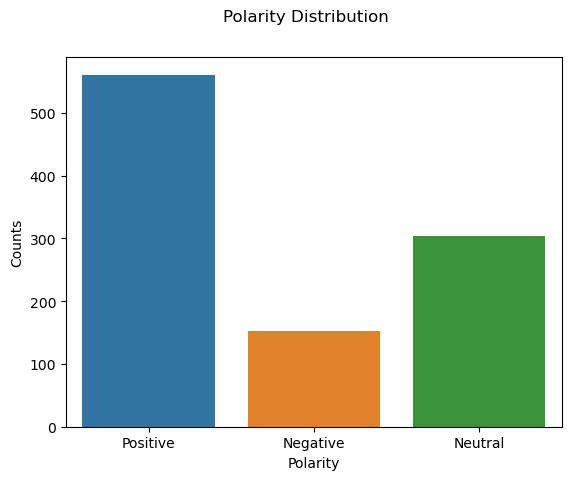

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate example data
polarity_counts = {'Positive': 561, 'Negative': 152, 'Neutral': 304}

# Create a figure with multiple subplots
fig, ax = plt.subplots()

# Set the title for the entire figure
fig.suptitle('Polarity Distribution')

# Extract the polarity labels and counts
polarities = list(polarity_counts.keys())
counts = list(polarity_counts.values())

# Create a bar plot with the polarity counts
sns.barplot(x=polarities, y=counts, ax=ax)

# Set labels for x and y axes
ax.set_xlabel('Polarity')
ax.set_ylabel('Counts')

# Show the plot
plt.show()


In [155]:
print(conclusion.format(", ".join(nouns), ", ".join(adjectives), ", ".join(verbs)))

Based on the analysis of nouns, adjectives, and verbs:
- The text focuses on the topics/entities: month, italy, matters, leather, cases, europe, example, amazon, lot, mujjo, brand, phone, today, hours, usage, devices, ipad, devices, button, right, photo, devices, time, phone, months, times, times, phone, sos, alot, answer, phone, case, iphones, phone, sos, way, bet, problem, phone, case, phone, feet, while, area, cell, service, time, sos, phone, store, iphone, weeks, afraid, earpiece, degrees, days, way, blower, jk, people, words, opinions, version, attention, iphone, journey, title, iphone, se, driver, camera, battery, camera, camera, person, point, screen, size, fits, palm, operation, day, hits, hand, decent, cover, look, perfect, size, series, feels, bulky, tbh, wan, battery, battery, end, day, fun, games, videos, time, habit, battery, things, email, reddit, etc, day, time, life, time, time, ngl, feels, gb, variant, day, age, half, storage, whoa, ikr, wait, home, button, face, none,